<a href="https://colab.research.google.com/github/DrVenkataRajeshKumar/CondyleClassification/blob/main/trail4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Load modules/models from EVA course
!rm -rf Modules

!git clone https://github.com/DrVenkataRajeshKumar/CondyleClassification -q --quiet
!mv ./CondyleClassification/Modules ./Modules
!rm -rf CondyleClassification
#print("Loaded EVA4 Modules")
from Modules import *

In [4]:
# Downloading dataset and unziping into proper folder structure
!rm -rf final_images
!wget -q https://github.com/DrVenkataRajeshKumar/CondyleClassification/releases/download/data1/final.images.zip
!unzip -q final.images.zip


In [5]:
find_mean_standard_deviation("final images/")

Sub-folders: ['class2', 'class3', 'class1', 'class4']
Mean: [0.43314943 0.43361538 0.43430133]
Std: [0.17610069 0.17660347 0.17742199]
Processing completed in 0m 1s


In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data = LoadDataset('final images/', tstRatio = 0.3, batch_size = 20)

['class1', 'class2', 'class3', 'class4']
207
69
53
61


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


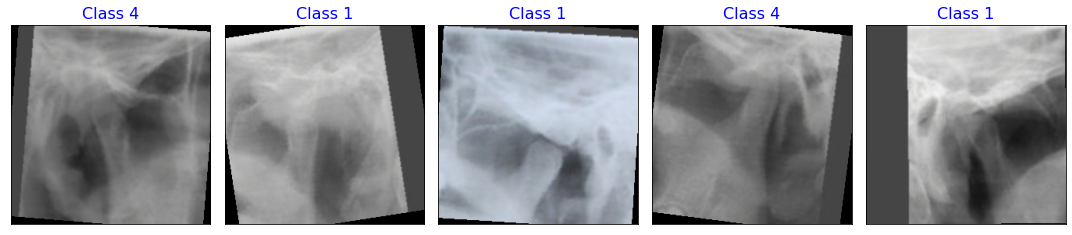

In [7]:
data.show_batch(save_as="sample.jpg")

In [8]:
import torch.optim as optim
#from torch_lr_finder import LRFinder

model_ft = models.mobilenet_v2(pretrained=True)
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).

for param in model_ft.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
model_ft.classifier[1] = nn.Linear(1280, 4)
model_ft = model_ft.to(device)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


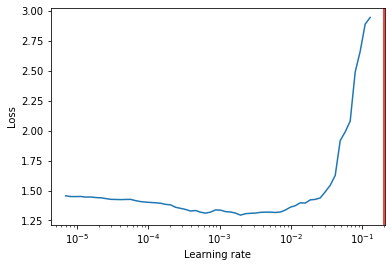

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ft.classifier[1].parameters(), lr=1e-6, weight_decay=0.01,momentum=0.9)
lr_finder = LRFinder(model_ft, optimizer, criterion, device="cuda")
lr_finder.range_test(data.dataloaders['train'], end_lr=10, num_iter=100)
lr_finder.plot(show_lr=0.2) # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial stat

In [10]:
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.classifier[1].parameters(), lr=0.9, momentum=0.09)

scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr=0.1, 
                                          steps_per_epoch=len(data.dataloaders['train']), #Training folder size/bs 
                                          epochs=25)

In [11]:
model_res, plotData = train_model(model_ft, data, device, criterion, optimizer_ft, scheduler,
                       num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWa

train Loss: 106.3046 Acc: 0.3345
val Loss: 46.2976 Acc: 0.5391

Epoch 1/24
----------
train Loss: 104.5120 Acc: 0.3382
val Loss: 137.1297 Acc: 0.1565

Epoch 2/24
----------
train Loss: 91.8522 Acc: 0.3782
val Loss: 148.8691 Acc: 0.5391

Epoch 3/24
----------
train Loss: 104.6824 Acc: 0.3345
val Loss: 72.6992 Acc: 0.5391

Epoch 4/24
----------
train Loss: 92.4537 Acc: 0.3709
val Loss: 180.3307 Acc: 0.1565

Epoch 5/24
----------
train Loss: 93.4524 Acc: 0.3600
val Loss: 82.4090 Acc: 0.5391

Epoch 6/24
----------
train Loss: 71.1033 Acc: 0.3927
val Loss: 48.2924 Acc: 0.4000

Epoch 7/24
----------
train Loss: 71.0886 Acc: 0.3745
val Loss: 157.0296 Acc: 0.5391

Epoch 8/24
----------
train Loss: 64.8289 Acc: 0.4218
val Loss: 143.1941 Acc: 0.5391

Epoch 9/24
----------
train Loss: 74.0980 Acc: 0.3818
val Loss: 230.7359 Acc: 0.1739

Epoch 10/24
----------
train Loss: 81.5708 Acc: 0.3964
val Loss: 66.3995 Acc: 0.1478

Epoch 11/24
----------
train Loss: 75.3993 Acc: 0.3527
val Loss: 127.4318 Acc

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


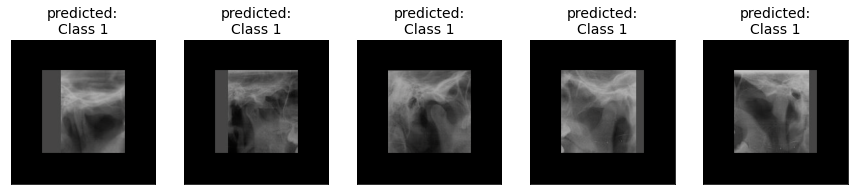

In [12]:
visualize_model(model_res, data, device,"visualize_1.jpg")

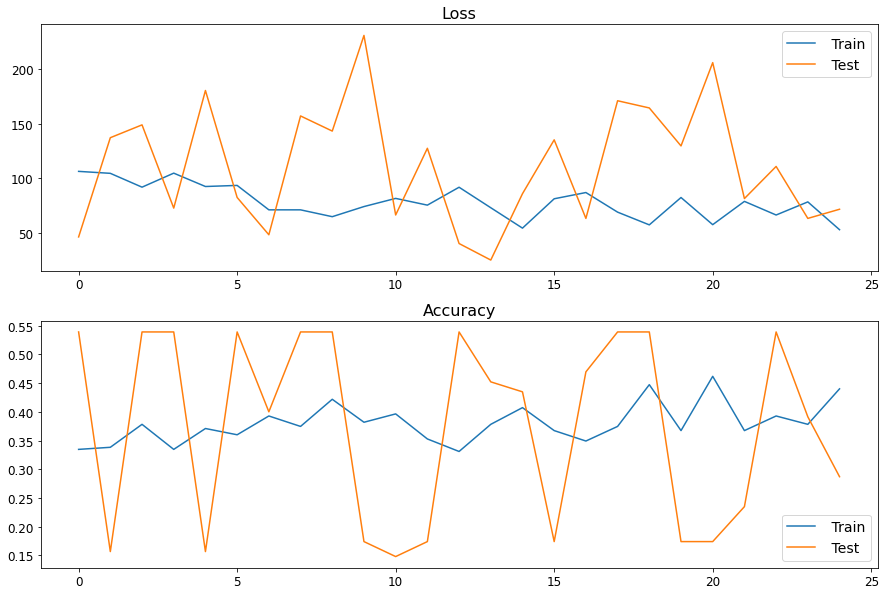

In [13]:
PlotGraph(plotData,"loss_accuracy_1.jpg")

In [14]:
model_conv = model_res
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).

model_conv = model_conv.to(device)

for param in model_conv.parameters():
    param.requires_grad = True

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()


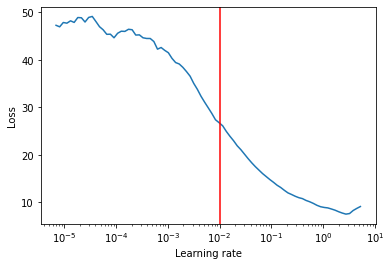

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_conv.parameters(), lr=1e-6, weight_decay=0.01,momentum=0.9)
lr_finder = LRFinder(model_conv, optimizer, criterion, device="cuda")
lr_finder.range_test(data.dataloaders['train'], end_lr=10, num_iter=100)
lr_finder.plot(show_lr=0.01) # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial stat

In [16]:
# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.parameters(), lr=0.001, momentum=0.9,nesterov=True, weight_decay=1e-4)

# One Cycle Policy
scheduler = optim.lr_scheduler.OneCycleLR(optimizer_conv,
                                          max_lr=0.01, 
                                          steps_per_epoch=len(data.dataloaders['train']), #Training folder size/bs
                                          epochs=30,pct_start=0.2, div_factor=10, final_div_factor=100)

In [17]:
model_final, plotData = train_model(model_conv, data, device, criterion, optimizer_conv, scheduler,
                       num_epochs=30)

Epoch 0/29
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 37.4155 Acc: 0.5164
val Loss: 256.4800 Acc: 0.5391

Epoch 1/29
----------
train Loss: 6.5453 Acc: 0.3964
val Loss: 10.1864 Acc: 0.2000

Epoch 2/29
----------
train Loss: 4.1696 Acc: 0.3273
val Loss: 112.5736 Acc: 0.1739

Epoch 3/29
----------
train Loss: 2.4498 Acc: 0.4945
val Loss: 4.5493 Acc: 0.5217

Epoch 4/29
----------
train Loss: 1.7720 Acc: 0.4945
val Loss: 3.5490 Acc: 0.2174

Epoch 5/29
----------
train Loss: 1.4204 Acc: 0.5273
val Loss: 1.4709 Acc: 0.4957

Epoch 6/29
----------
train Loss: 1.2870 Acc: 0.5200
val Loss: 1.2703 Acc: 0.5391

Epoch 7/29
----------
train Loss: 1.3610 Acc: 0.5200
val Loss: 1.3600 Acc: 0.5391

Epoch 8/29
----------
train Loss: 1.2861 Acc: 0.5127
val Loss: 1.4475 Acc: 0.3043

Epoch 9/29
----------
train Loss: 1.2700 Acc: 0.5236
val Loss: 2.1623 Acc: 0.2609

Epoch 10/29
----------
train Loss: 1.1892 Acc: 0.5418
val Loss: 1.5860 Acc: 0.4174

Epoch 11/29
----------
train Loss: 1.2290 Acc: 0.5236
val Loss: 1.6228 Acc: 0.3217

Epoch 12/29
------

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


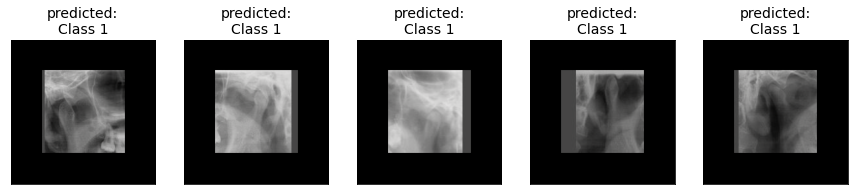

In [18]:
visualize_model(model_res, data, device,"visualize_2.jpg")
plt.ioff()
plt.show()

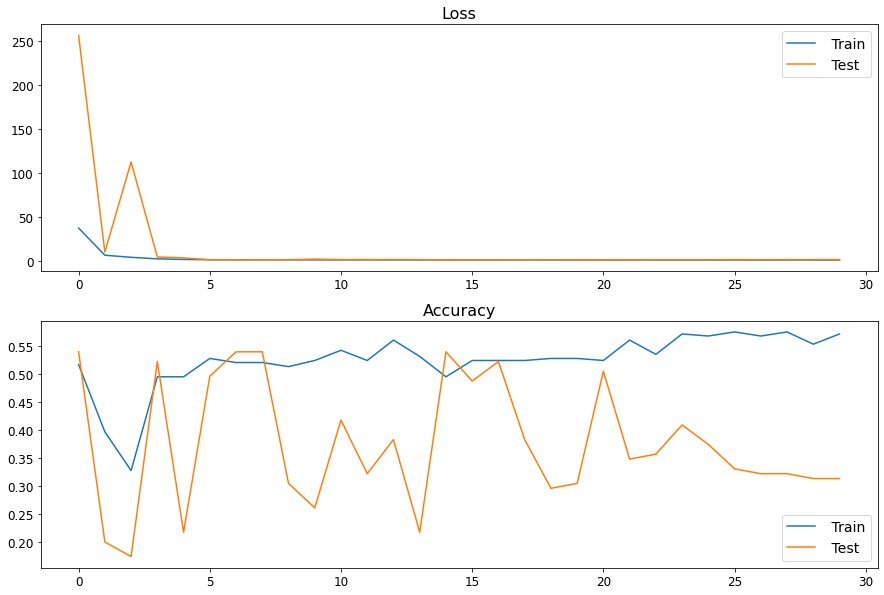

In [19]:
PlotGraph(plotData,"loss_accuracy_2.jpg")

Miss-Classified Images in Class 2


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


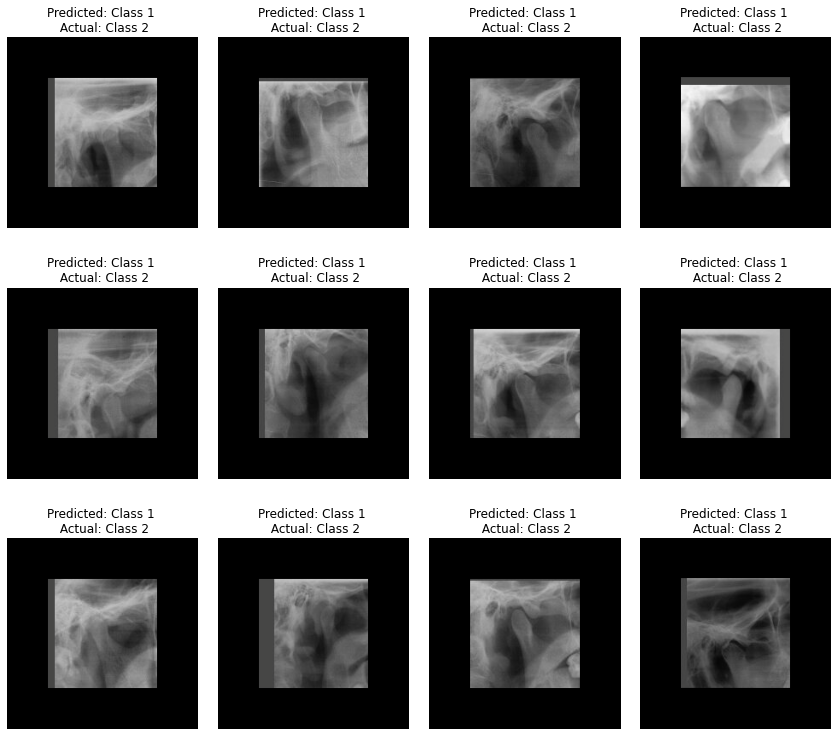

In [21]:
print("Miss-Classified Images in Class 2")
ShowMissclassifiedImages(model_final, data,1, device,save_as="MisclassifiedClass2.jpg")

Miss-Classified Images in Class 3


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


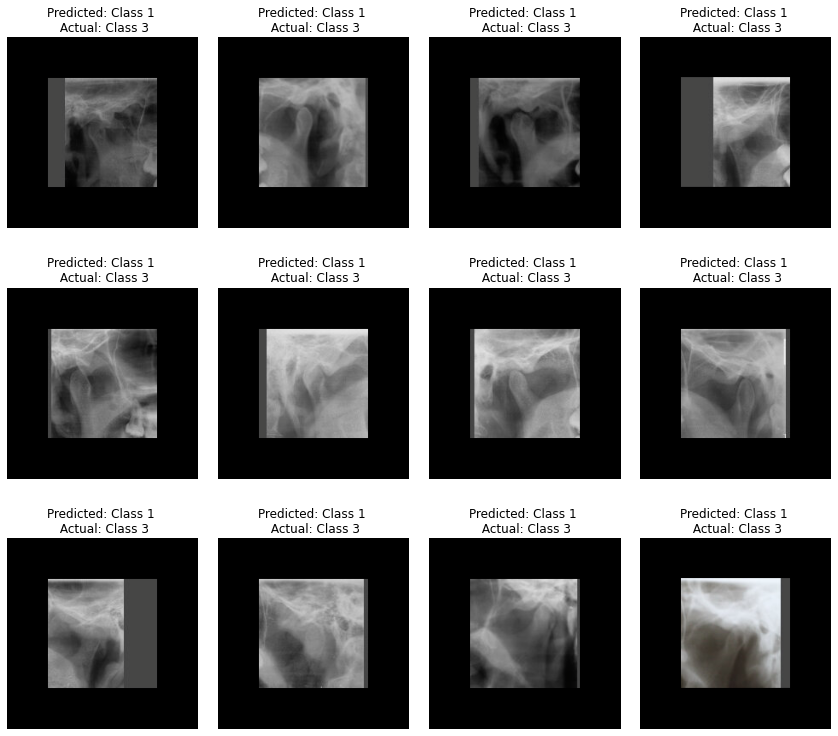

In [22]:
print("Miss-Classified Images in Class 3")
ShowMissclassifiedImages(model_final, data,2, device,save_as="MisclassifiedClass3.jpg")

Miss-Classified Images in Class 4


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


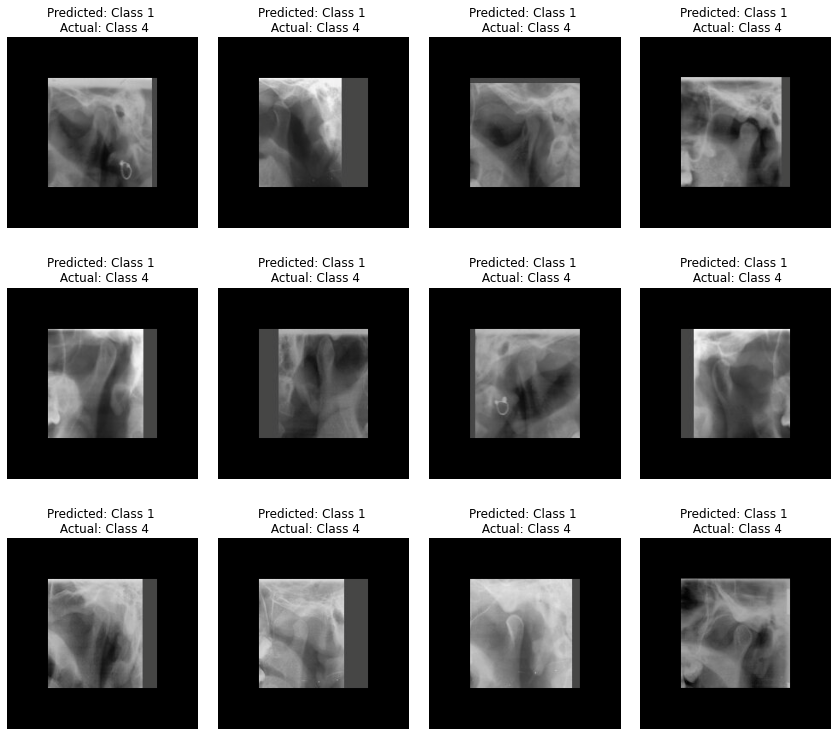

In [23]:
print("Miss-Classified Images in Class 4")
ShowMissclassifiedImages(model_final, data,3, device,save_as="MisclassifiedClass4.jpg")

In [24]:
# Save GPU Model
torch.save(model_final.state_dict(), '/content/mobilenet_v2_custom_trained_gpu_v6.pt')

# Load CPU Model
device = torch.device('cpu')
model = models.mobilenet_v2(pretrained=False)
model.classifier[1] = nn.Linear(1280, 4)
model.load_state_dict(torch.load('/content/mobilenet_v2_custom_trained_gpu_v6.pt',
                                 map_location=device))

# Saving Trace Model
model.eval()
# trace model with a dummy input
traced_model = torch.jit.trace(model, torch.randn(1, 3, 224, 224))
traced_model.save('mobilenet_v2_custom_trained_v6.pt')